# EDA: speech

1. Multiplying the signal in the audioplayer leads to clipping, reducing clarity

## Load functions

In [1]:
using PyPlot
using WAV
using Base64
using Compat
using DSP
using Distributions
using FFTW



include("../functions/preprocessing.jl")
include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/warpedfilter.jl")
include("../functions/auxiliary/fourier.jl")
;

## Load speech signal

In [2]:
# signal preprocessing
sound_file = "../data/woman.wav"         # specify sound location
;

In [3]:
x, fs = wavread(sound_file, format="native")
fs = Int(fs)
t = (1:length(x))/fs
x = squeeze(x .- mean(x))

println("fs: "*string(fs)*" Hz  ---  number of samples: "*string(length(x))*"  ---   duration: "*string(length(x)/fs)*" sec")
audioplayers(x/maximum(x), fs=fs)
;

<source src="data:audio/wav;base64,UklGRrynDwBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YYCnDwBdlMK8dwKmPCDtDz2dD708pU6bPDr2ETyQsK+7TiyIu9nLGbu4UBA8hScmPQSh+zzzDqm84n1JOqVOmzy9mxM8ZFiVuzmz/zsSK908XpumOjeHq7yZPQm87ZjRO4uliDghkVu8gz6MvLa9xrvXbMQ7EZQOOzFWIjsqFQg8u3qoPF6bpjpKXJC8eAvTvN3im7woV+o8ifg7PW/Dxzw5s/87dSaJO0g7Jbx53kK8aERDO5jEuTxqsBU9jkM/PVzu4jzXbMQ7e/+tvKTTD7ytugk8zNa9Oz4gqjzGEK8846gqPC+P5LpD/AC9/WxevXSfHr2pyGo7qlcCPQPF3jv5l7C5HV6WPDWrDjxi38W8UOkvvfY4QbygnjY9JZtgPcgxGjy0F2e8l1qIunEAdrsSuf677/cmu6F+oztGwtU8CUcVPa0dVzx0OZ+7pNMPvEQRjbxOLIi7JC1SPFAiHzwl5ke7Uhg2O7gjgDzD5hY8qh4TvKyGlbpdrjw7umJqvIvNFDpJ7gE9lW2RPOuiOrxApGI8ONWmPA+6OruxioG8D7o6u8qKfjvY3q+6qchqO3txjDtx5DI8//KqPLizXTxz2kk7uv8cvP4fOzzXbMQ74gLLOwb+BzuOpwK8+2cBO9dsxDvSIcE7LT+gPBUfuDyshpW6c5M/vCXKBDzp8y08tiUvOpduDrkY8es7FvtUvL93sLzaJH68503OO9HeBj3ZSOE81gRculA+Yrt2LzY8Cy+RvG5UG72DdEm8m1MzPc1wPj3M1r07xZUjvBqXSzwRlA47yg23vO4Kvbq7eqg85woUPQ/UtDw9pR68+02HvKyGlbpApGI81vG4POkp6zxrmS88q6xBugbkjbw/Kde8tbQZvB/iTjx6Wc48qlcCPWaE6TynbwY8apCCOwLY9Lvgo/U6EivdPJj8Cj2V0N481JqQPHx6OTwXmAe8SeGEuynS9TuBxTw8VdBvPCoVCDxOLIi7b+6bu6yGlbql3Ly7i1KWO7izXTxApGI8+dQ3PJw8TTw69hE8RbvxuuRhILvYdXE8Tb8XPWPrJD0dXpY8kaZGPFvUaLvjqCo8S6qLPFZtIjx8Tak8h0b9PFu4JTxDloG7Xw2Su1T8DLqhfqM7+dQ3PL2bEzzkYSC7VHeLuxb7VLxb1Gi7x4u6O3Q5n7uwcsO7k5xdOweV1jyw5KE8SG+ZOvdB7rsRlA47MJbIPIgGVzuVbZE8inIpPfezzDyvzGO88w6pvBbFl7z8jPG7di82PN7AdDyLpYg4VHeLuxGKizm/9Hc7luicO2j9OLz1AoS8tr3Gu8FAtzswYAs8cNuFOyfAGzurmZ48KPScPKbJpjuwcsO7i1KWO75ugzwC54U8UEjluW/um7u1S9s6NGj8O8kEijwJtkE86fMtPLt6qDyq/Os8cbeiPI7UkrzPWLq8JcoEPEeCLzsycmW8R4IvO7+DDz1ApGI8QvAhvLQXZ7yRK7u8VHeLu25IPLwyDxi8imWsuwgQ4juPhds8VdBvPCXmR7sD8LK8tzjSvC5Izbx/VCe6SbawPEZfiDz8m4I8YGZ2PEBBFTxpo5i79WXRvD/GibwuHfk7nM0gPfAmLT0iqZk8zjUTuxb7VLzPWLq8qbAEvY7Ukry89bM7cRrwPGhEQzvkYSC7y3foOuJ9SToLL5G8EXqUvOR7mjw14cs82HVxPInzwDpgAyk8UD5iu0IdsryU8gW890Huu7/0dzuX8Uk8w58Muz0IbLzRNNe7Ern+u/2kr7zgDDS8nx/OOvgu2DvF+HC8MTyovGOyNbxCU2+8tzjSvMJri7yXbg65ib9MvCGRW7wHI/i70TTXu7/0dzvtmNE7z1i6vPVl0byiJAM8NGj8O4UaqbuJv0y8ah6kvDdaG7y7CMq7v0ogvGmjmLs7yYE8wUC3Oz/GibyWdr68HmfDvJCwr7tDloG7TiyIu3yWfLuih1A8JcoEPEJTb7xSNHm8DW77uyOH8jtgZnY8x4u6OxwqFTv7ZwE7lPIFvLW0GbyZoFa8v3ewvC+P5Lq/9Hc7PaUevFT8DLph1pg8f1QnuiGRW7zeMJc8q5mePJOcXTsLL5G86HiivOuiOrx+84i8Q5aBux487zuMW0M8jFtDPFT8DLoPZQi9Y74UvZ/rWbxsbJ886SnrPA19jDwC54U8Tel1vItFGb1pCRi9kx+WvLfVhLxoREM7wxzUPJeCHT13AqY8RBGNvLzoNr3hGBO9qyfAu0vXGzxOAbQ8JZtgPQP8ET3STJW8ph93vaPITr0XmAe8v+r0OUeCLztAd9I8BdlMPT4gqjwGGku8vCCIvMpDdLwQ3eG8xxncvKF+ozsnsgA9K0vFPJ4yZDtHgi87umJqvPuw1LyWdr68TYYovG/um7utHVc8LP0DPczWvTuOClC8+02HvER02rz1ZdG8tiUvOnpZzjwkLVI8ed5CvGj9OLzNAZK8R55yvFRV5LwsJ2K8XpumOjRo/Duw5KE8GPHrO4nzwDrRNNe7WBwvvELwIbw/xom8l24OuVZtIjz+Hzs8Q2utPLaqsDvK4Ca8WqDnvAYaS7x6hKK7r2kWvPuDRLxoOsA58uPUO69pFrwEzwG9T6eTvIuliDg7ElW7qyfAu1o9mryQsK+7MJbIPJob4jysFKo7xp7Qu6I3FLjnYOS728EwvOCj9TrifUk6vZsTPL/0dztFz3e5+C7YOxlj17pDloG7P8aJvGZqb7vCsqK68O09vO/3JruqHhO8UtErvGLfxbxKv928SeGEu3x6OTyIBlc7umJqvIiJj7wRsFG8iAZXO0W78boHI/i7vm6DPFaj3zwneRG8r5amvCIuDryZPQm84i2fvIBKsbwXmAe8gLyPO1ZtIjxLOmk828EwvBzjCryetZy8FLALvZnN5rz8jPG7mzOgO1LRK7xCHbK86s/KvP0H/bzX+uW85YTHvEBBFTxnIZw8kLCvu0LwIbwRTQS84n1JOqdvBjzv9ya7zd9qPARrPjxzkz+8UmMdvSG+67zDnwy7//KqPI+F2zwjh/I7r2kWvJ61nLxyJTG9HFI3vTzSrryAvI87RYwYPLsIyruvaRa8D2UIvbDYQr3ikgC9+4NEvJk9CbykNl28tUvbOjg49Dwl5ke7dRf4vD2lHry2qrA7XWcyvLGKgbwSuf67Al12uv4fOzxIb5k6/IzxuxDd4byL4Le8gcU8PJCdmTtDloG76fMtPFu4JTzKQ3S8kJAcvSrcGL0Eaz487jJSPYgbAT09CGy8TLO4vB5nw7whW568Tel1vC4d+Ts66jI9GK4xPUW78brtw6W8uSytvPuw1Lz1AoS8gLyPO2qQgjt0x7M62iR+vIOh2byvzGO8Uhg2O1A+YrsneRG8aDrAORLIjzxR9Y48iImPvFPdCr35l7C5aXjEPHSzLTlPp5O8HjzvOyDtDz1TTLc8N71ovLgXIb2psAS9WBwvvPY4Qbx7cYw7xc4SPZE3Gj1U/Ay6csDPvK+WprzSTJW8Wuf+upVtkTxcJjQ9SVFPPShX6jypyGo7J3kRvEyzuLwT0by8Rqhbu/ezzDz0v/E8oodQPKoeE7y/SiC8EYqLOVR3i7sIEOI73sB0PA19jDw7yYE8/h87PHOTP7xwzPS8Xcp/vHG3ojysrio9PYP3PGuZLzzHto68mT0JvCamobx0nx6915eYvP/yqjxdoCE9CbZBPACZirw0MIO8+4NEvG5IPLy0F2e84n1JOsPmFjycPE08J8AbO18NkrtWbSI8a/x8PNIhwTuJ88A6mriUPNh1cTygkbm7jtSSvNYEXLoSyI88tUvbOoiJj7zCa4u8HjzvO9nlkzzCSWQ8BzKJPJ0PvTw1Dlw8RHTavHUX+LwsJ2K8tqqwOw/UtDx3Z

fs: 16000 Hz  ---  number of samples: 256480  ---   duration: 16.03 sec


## Plot signal

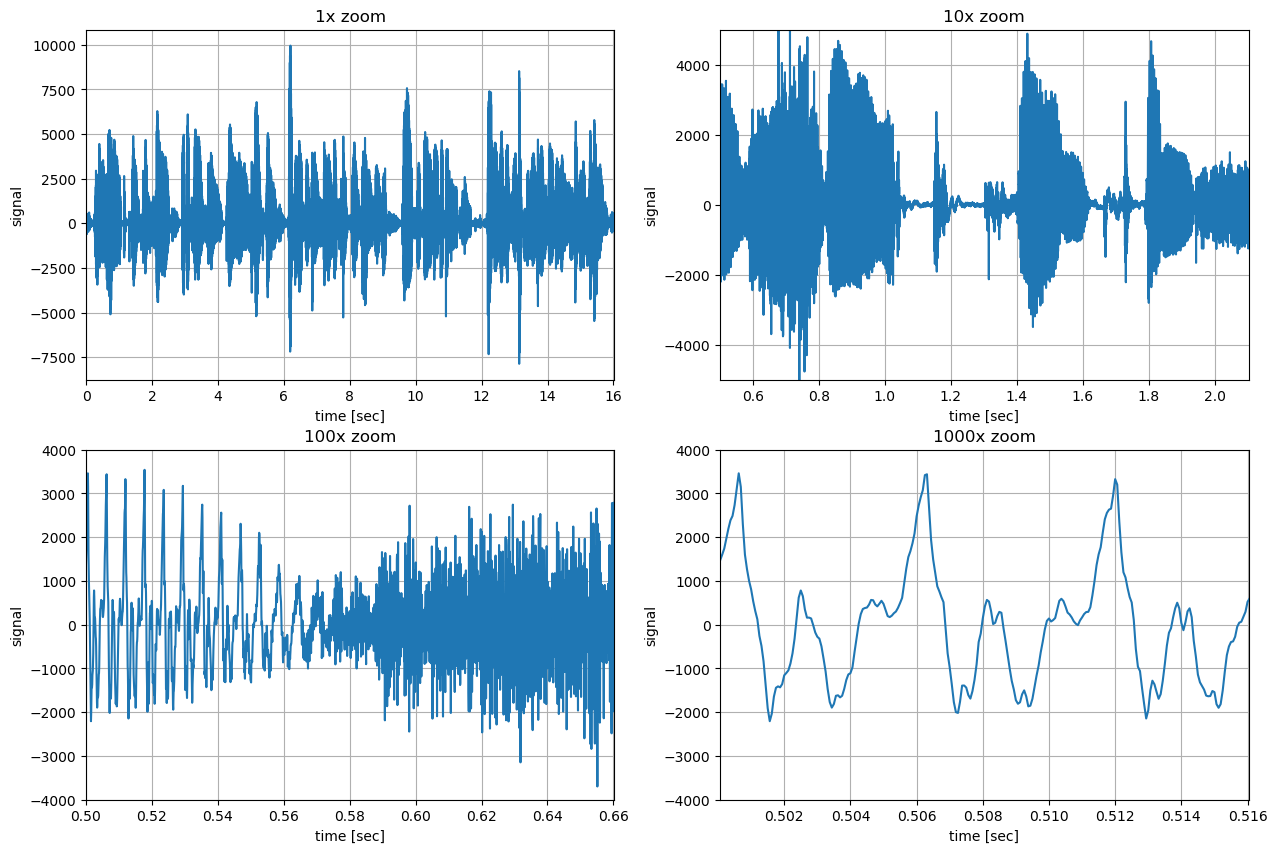

In [4]:
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_ylim(-5000, 5000), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_ylim(-4000, 4000), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_ylim(-4000, 4000), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

## Plot signal distribution


Laplacian distribution:
$$ f(x \mid \mu, \ b) = \frac{1}{2b}e^{-\frac{\| x-\mu \|}{b}} $$
with sufficient statistics
$$\mu = \frac{1}{N}\sum_{n=1}^N x[n]$$ 
$$b = \frac{1}{N}\sum_{n=1}^N \| x[n] - \mu \|$$ 

In [5]:
Laplace(x, μ, b) = 1/2/b*exp.(-abs.(x .- μ)/b)
Laplace_ss_μ(x) = mean(x) 
Laplace_ss_b(x, μ) = 1/length(x)*sum(abs.(x .- μ))

Laplace_ss_b (generic function with 1 method)

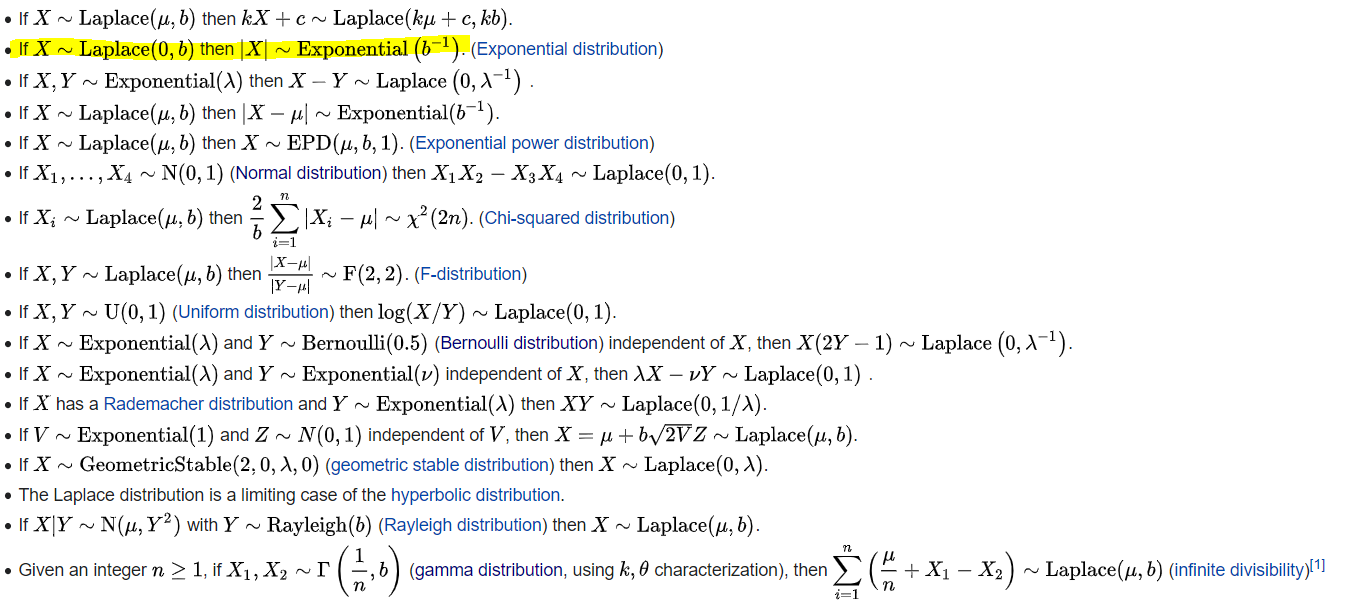

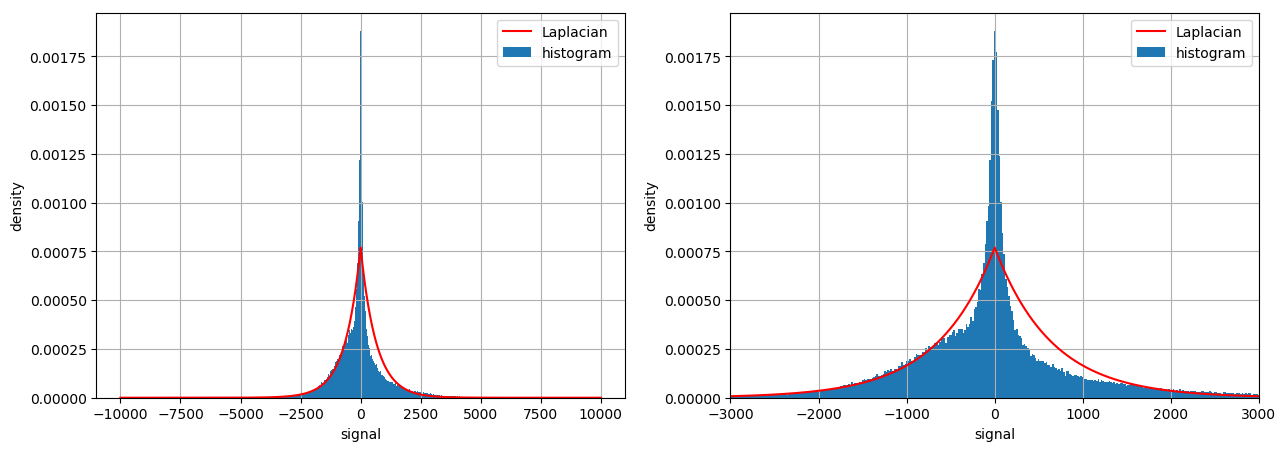

In [6]:
# create subplots
_, ax = plt.subplots(ncols=2, figsize=(15,5))

# plot histogram of speech signal
ax[1].hist(x, bins=1000, density=true, label="histogram"), ax[1].grid(), ax[1].set_xlabel("signal"), ax[1].set_ylabel("density")
ax[2].hist(x, bins=1000, density=true, label="histogram"), ax[2].grid(), ax[2].set_xlabel("signal"), ax[2].set_ylabel("density"), ax[2].set_xlim(-3000, 3000)

# plot laplacian distribution with parameters estimated from signal
ax[1].plot(-10000:10000, Laplace(-10000:10000, Laplace_ss_μ(x), Laplace_ss_b(x, Laplace_ss_μ(x))), color="red", label="Laplacian")
ax[2].plot(-10000:10000, Laplace(-10000:10000, Laplace_ss_μ(x), Laplace_ss_b(x, Laplace_ss_μ(x))), color="red", label="Laplacian")
ax[1].legend(), ax[2].legend()
;

Super Gaussian distribution:
$$ f(x \mid \mu, \ b) = \frac{1}{2b}e^{-\frac{\| x-\mu \|^p}{b}} $$
with sufficient statistics
$$\mu = \frac{1}{N}\sum_{n=1}^N x[n]$$ 
$$b = \frac{1}{N}\sum_{n=1}^N \| x[n] - \mu \|^p$$ 

In [7]:
SGaussian(x, μ, b, p) = 1/(abs(x[1]-x[2])*sum(exp.(-abs2.(x .- μ).^p/(b))))*exp.(-abs2.(x .- μ).^p/(b))
SGaussian_ss_μ(x) = mean(x) 
SGaussian_ss_b(x, μ, p) = 1/length(x)*sum(abs2.(x .- μ).^p)

SGaussian_ss_b (generic function with 1 method)

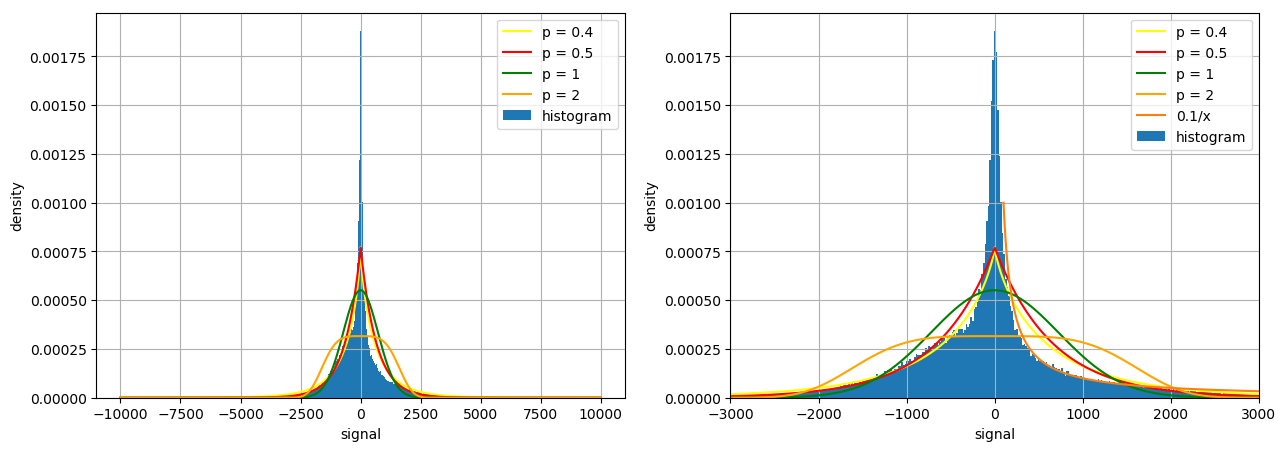

In [8]:
# create subplots
_, ax = plt.subplots(ncols=2, figsize=(15,5))

# plot histogram of speech signal
ax[1].hist(x, bins=1000, density=true, label="histogram"), ax[1].grid(), ax[1].set_xlabel("signal"), ax[1].set_ylabel("density")
ax[2].hist(x, bins=1000, density=true, label="histogram"), ax[2].grid(), ax[2].set_xlabel("signal"), ax[2].set_ylabel("density"), ax[2].set_xlim(-3000, 3000)

# plot supergaussian distribution with parameters estimated from signal
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.4), 0.4), color="yellow", label="p = 0.4")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.4), 0.4), color="yellow", label="p = 0.4")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.5), 0.5), color="red", label="p = 0.5")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 0.5), 0.5), color="red", label="p = 0.5")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 1), 1), color="green", label="p = 1")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 1), 1), color="green", label="p = 1")
ax[1].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 2), 2), color="orange", label="p = 2")
ax[2].plot(-10000:10000, SGaussian(-10000:10000, SGaussian_ss_μ(x), SGaussian_ss_b(x, SGaussian_ss_μ(x), 2), 2), color="orange", label="p = 2")
ax[2].plot(100:3000, 0.1 ./(100:3000).^1.0, label="0.1/x")
ax[1].legend(), ax[2].legend()
;

In [9]:
y = simplify(log.(abs.(x)))

nr_clusters = 2

function GMM_initialize(nr_clusters::Int)
    μ = exp.(randn(nr_clusters))
    σ = exp.(randn(nr_clusters))
    πi = ones(nr_clusters)./nr_clusters
    return μ, σ, πi
end

function GMM_E(y, μ, σ, πi)
    γ = hcat([πi[k]*Gaussian(y, μ[k], σ[k]) for k = 1:length(πi)]...)
    return γ ./ sum(γ, dims=2)
end

function GMM_M(y, γ)
    μ = squeeze(collect(y'*γ))./squeeze(sum(γ,dims=1))
    σ = sqrt.([sum(γ[:,k].*abs2.(y .- μ[k]) ) for k = 1:size(γ,2)]./squeeze(sum(γ,dims=1)))
    πi = squeeze(sum(γ, dims=1)/length(y))
    return μ, σ, πi
end

function GMM_EM(y, μ, σ, πi)
    γ = GMM_E(y, μ, σ, πi)
    μ, σ, πi = GMM_M(y, γ)
    return μ, σ, πi
end

function GMM_update(y, μ, σ, πi, iterations)
    for _ = 1 : iterations
        μ, σ, πi = GMM_EM(y, μ, σ, πi)
    end
    return μ, σ, πi 
end

function GMM_fit(y, nr_clusters, iterations)
    μ, σ, πi = GMM_initialize(nr_clusters)
    return GMM_update(y, μ, σ, πi, iterations)
end

Gaussian(x, μ, σ) = 1/sqrt(2*pi*σ^2)*exp.(-(x .-μ).^2/(2*σ^2))

μ, σ, πi = GMM_fit(y, 2, 100)

([4.688005092857937, 6.764267299868951], [1.5573701181223252, 0.7005630888732849], [0.5699462238616311, 0.4300537761383688])

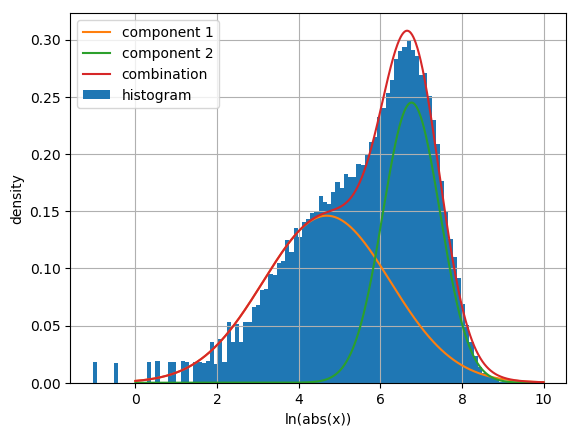

In [10]:
plt.hist(log.(abs.(x)), bins=100, density=true, label="histogram")
plt.plot(0:0.01:10, πi[1]*Gaussian(0:0.01:10, μ[1], σ[1]), label="component 1")
plt.plot(0:0.01:10, πi[2]*Gaussian(0:0.01:10, μ[2], σ[2]), label="component 2")
plt.plot(0:0.01:10, πi[1]*Gaussian(0:0.01:10, μ[1], σ[1]) + πi[2]*Gaussian(0:0.01:10, μ[2], σ[2]), label="combination")
plt.xlabel("ln(abs(x))")
plt.ylabel("density")
plt.legend()
plt.grid()
;

## μ-law companding

$$ f(x) = sgn(x) \frac{\ln(1+\mu|x|))}{\ln(1+\mu)} \qquad -1 \leq x \leq 1$$

$$ f^{-1}(x) = sgn(x) (1/\mu) ((1+\mu)^{|x|}-1) $$

In [11]:
function μ_law_companding(x, μ)
    return sign.(x) .* log.(1 .+ μ*abs.(x)) / log(1 + μ)
end

function μ_law_expansion(x, μ)
    return sign.(x) .* (1 / μ) .* ( (1 .+ μ).^abs.(x) .- 1 )
end
;

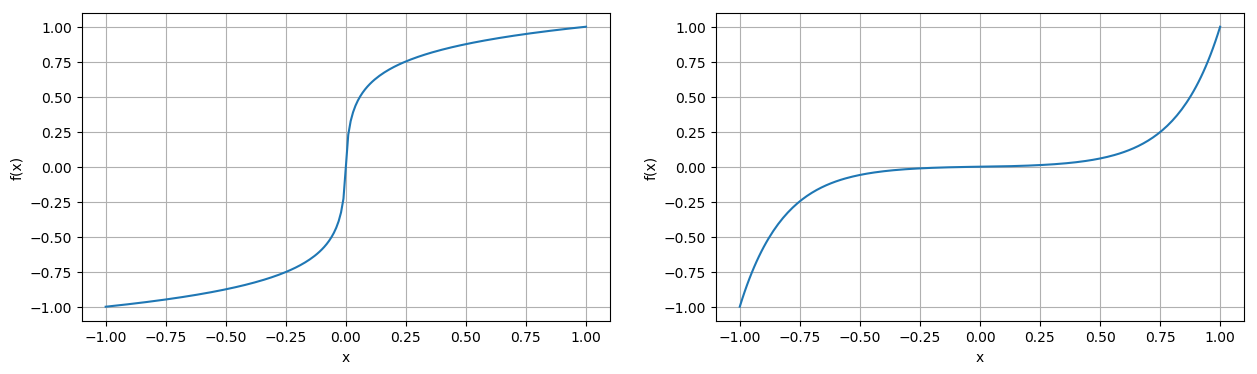

In [12]:
_, ax = plt.subplots(ncols=2, figsize=(15,4))

ax[1].plot(-1:0.01:1, μ_law_companding(-1:0.01:1, 255)), ax[1].grid(), ax[1].set_xlabel("x"), ax[1].set_ylabel("f(x)")
ax[2].plot(-1:0.01:1, μ_law_expansion(-1:0.01:1, 255)), ax[2].grid(), ax[2].set_xlabel("x"), ax[2].set_ylabel("f(x)")
;

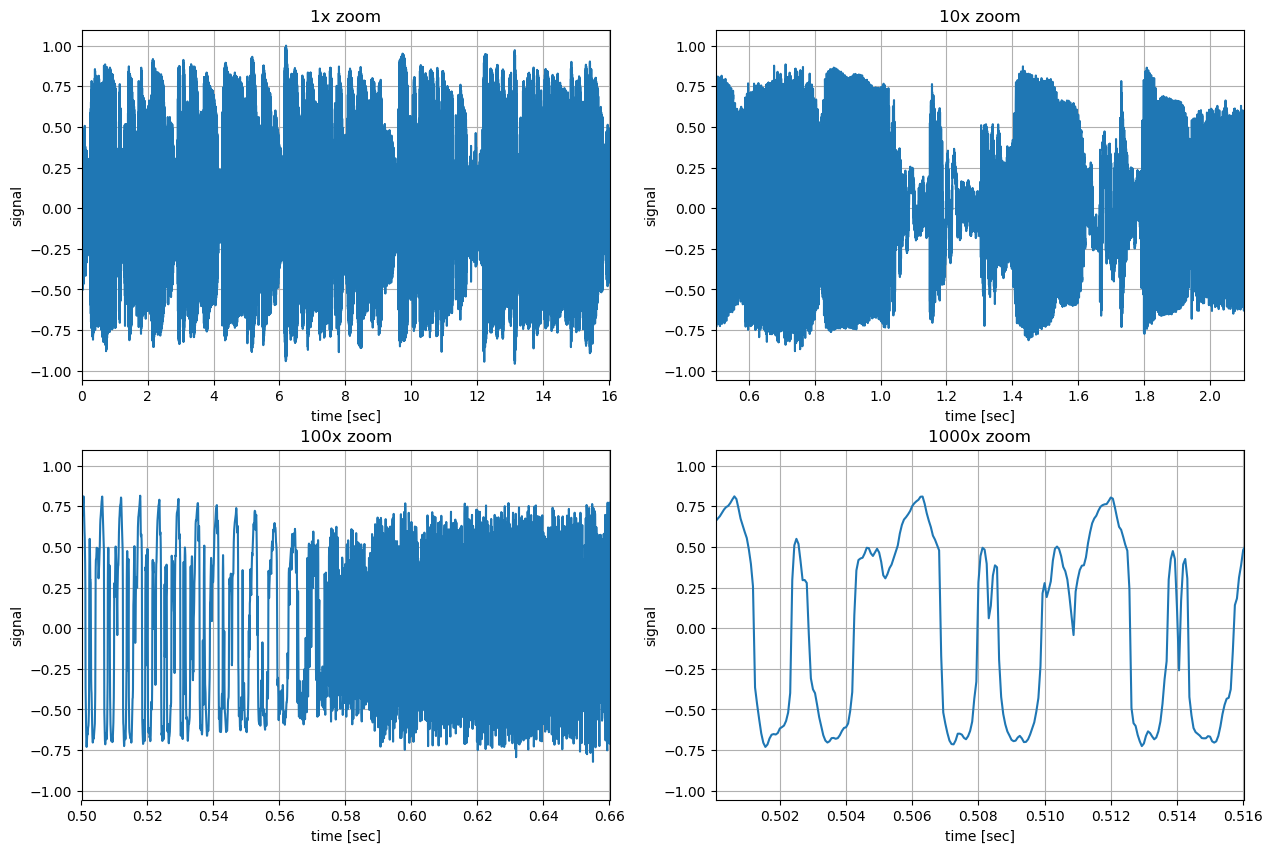

In [13]:
# calculate μ_law
x_μ = μ_law_companding(x./maximum(x), 255)

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x_μ), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x_μ), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x_μ), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x_μ), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

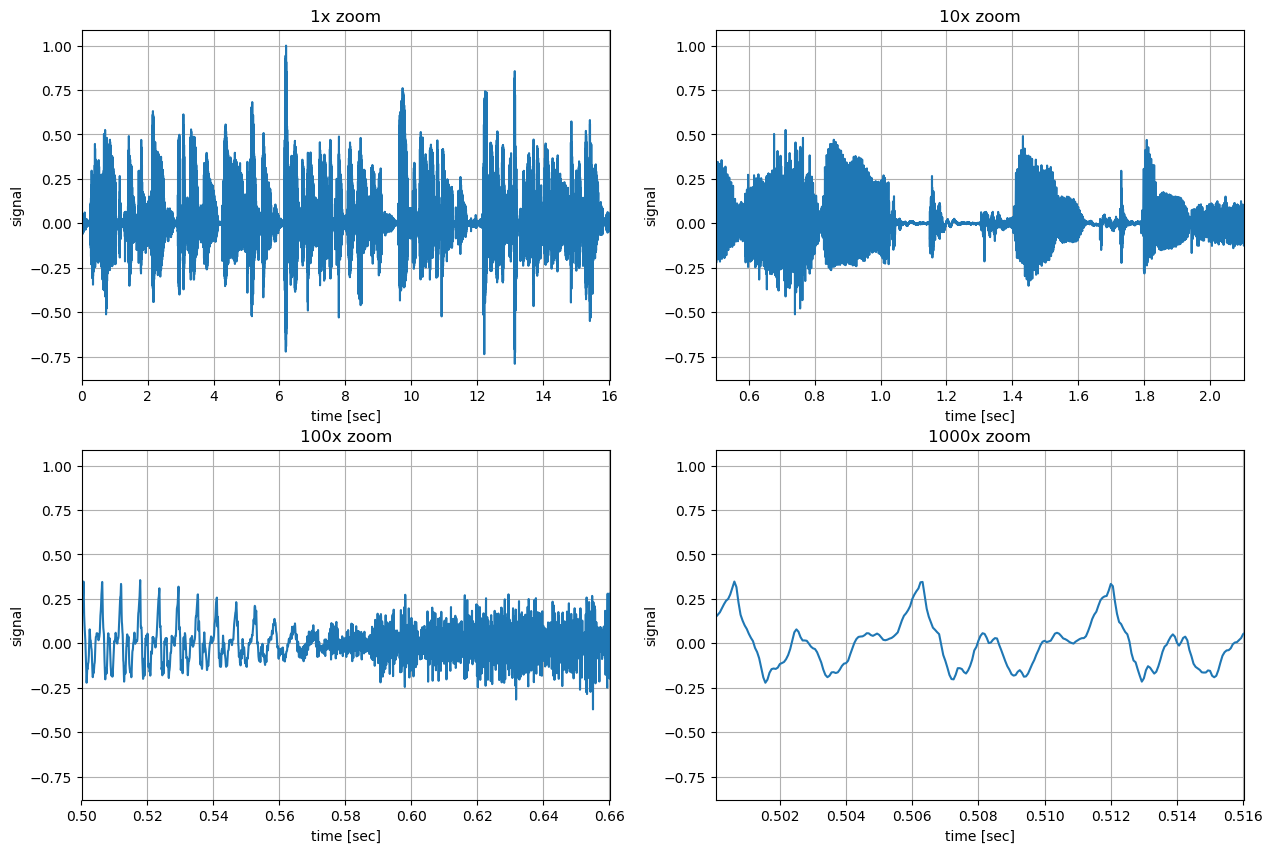

In [14]:
# check whether inverse works
x = μ_law_expansion(x_μ, 255)

_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

ax[1,1].plot(t, x), ax[1,1].set_xlim(minimum(t), maximum(t)), ax[1,1].set_title("1x zoom"), ax[1,1].set_xlabel("time [sec]"), ax[1,1].set_ylabel("signal"), ax[1,1].grid()
ax[1,2].plot(t, x), ax[1,2].set_xlim(minimum(t)+0.5, maximum(t)/10+0.5), ax[1,2].set_title("10x zoom"), ax[1,2].set_xlabel("time [sec]"), ax[1,2].set_ylabel("signal"), ax[1,2].grid()
ax[2,1].plot(t, x), ax[2,1].set_xlim(minimum(t)+0.5, maximum(t)/100+0.5), ax[2,1].set_title("100x zoom"), ax[2,1].set_xlabel("time [sec]"), ax[2,1].set_ylabel("signal"), ax[2,1].grid()
ax[2,2].plot(t, x), ax[2,2].set_xlim(minimum(t)+0.5, maximum(t)/1000+0.5), ax[2,2].set_title("1000x zoom"), ax[2,2].set_xlabel("time [sec]"), ax[2,2].set_ylabel("signal"), ax[2,2].grid()
;

## Plot signal distribution

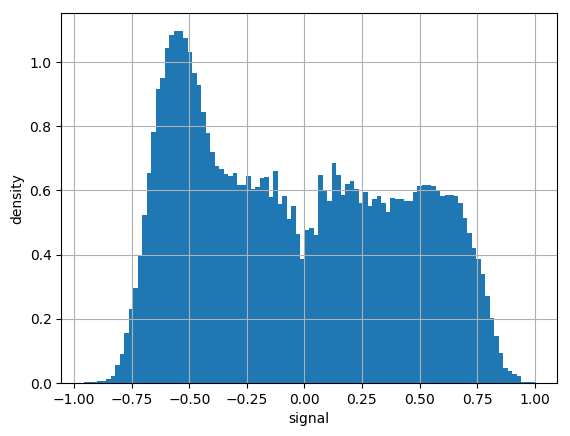

In [15]:
# plot histogram of speech signal
plt.hist(x_μ, bins=100, density=true, label="histogram"), plt.grid(), plt.xlabel("signal"), plt.ylabel("density")
;

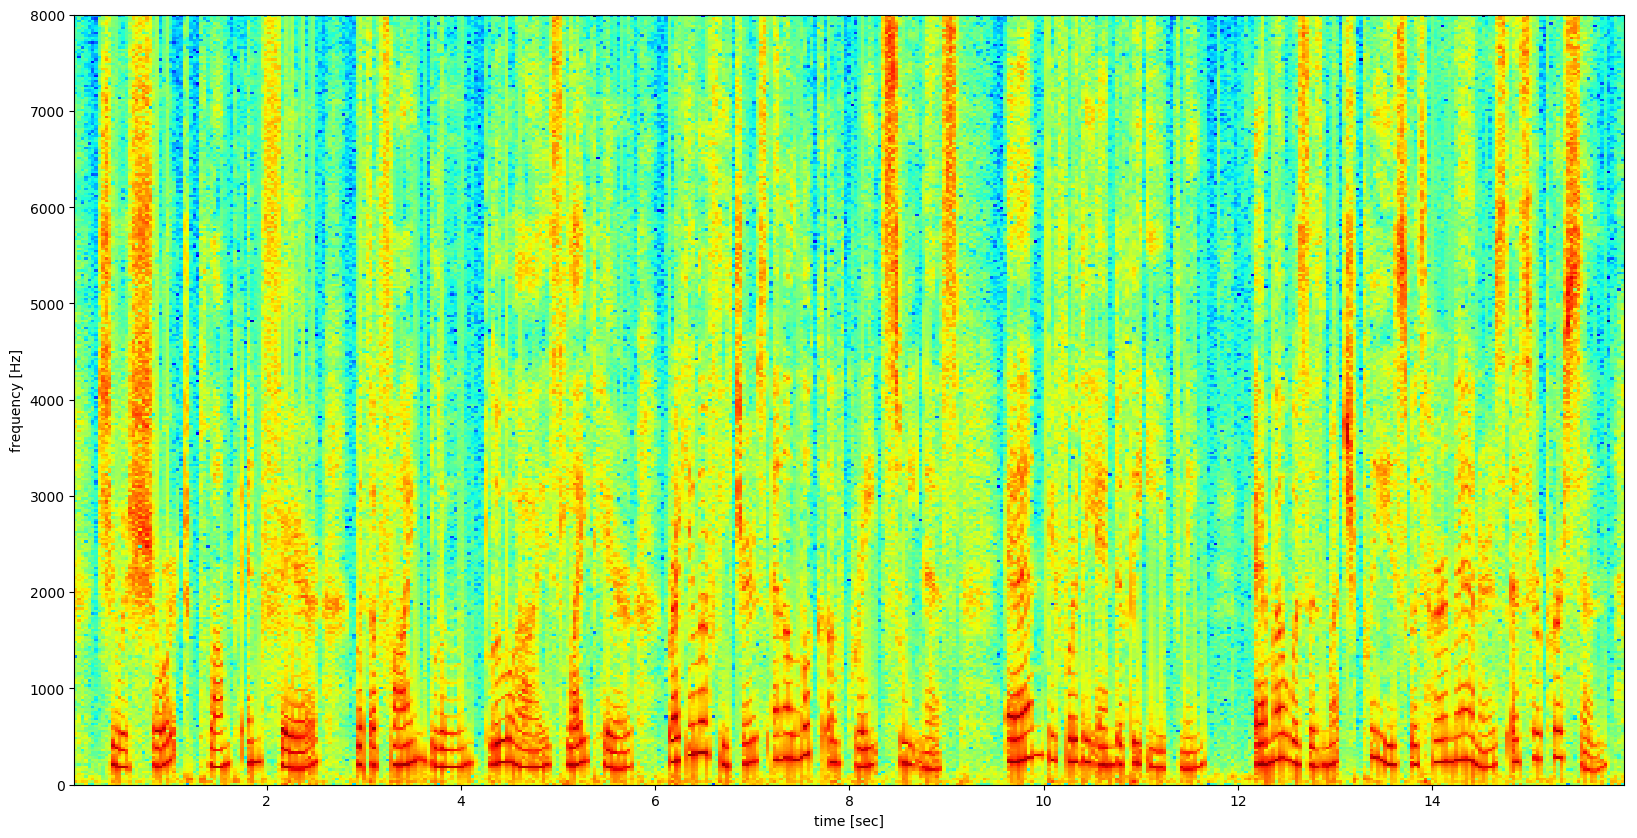

In [16]:
plt.figure(figsize=(20,10))
plot_spectrogram(spectrogram(x, 640, 80, fs=fs), fs)
plt.clim(-14, -3)

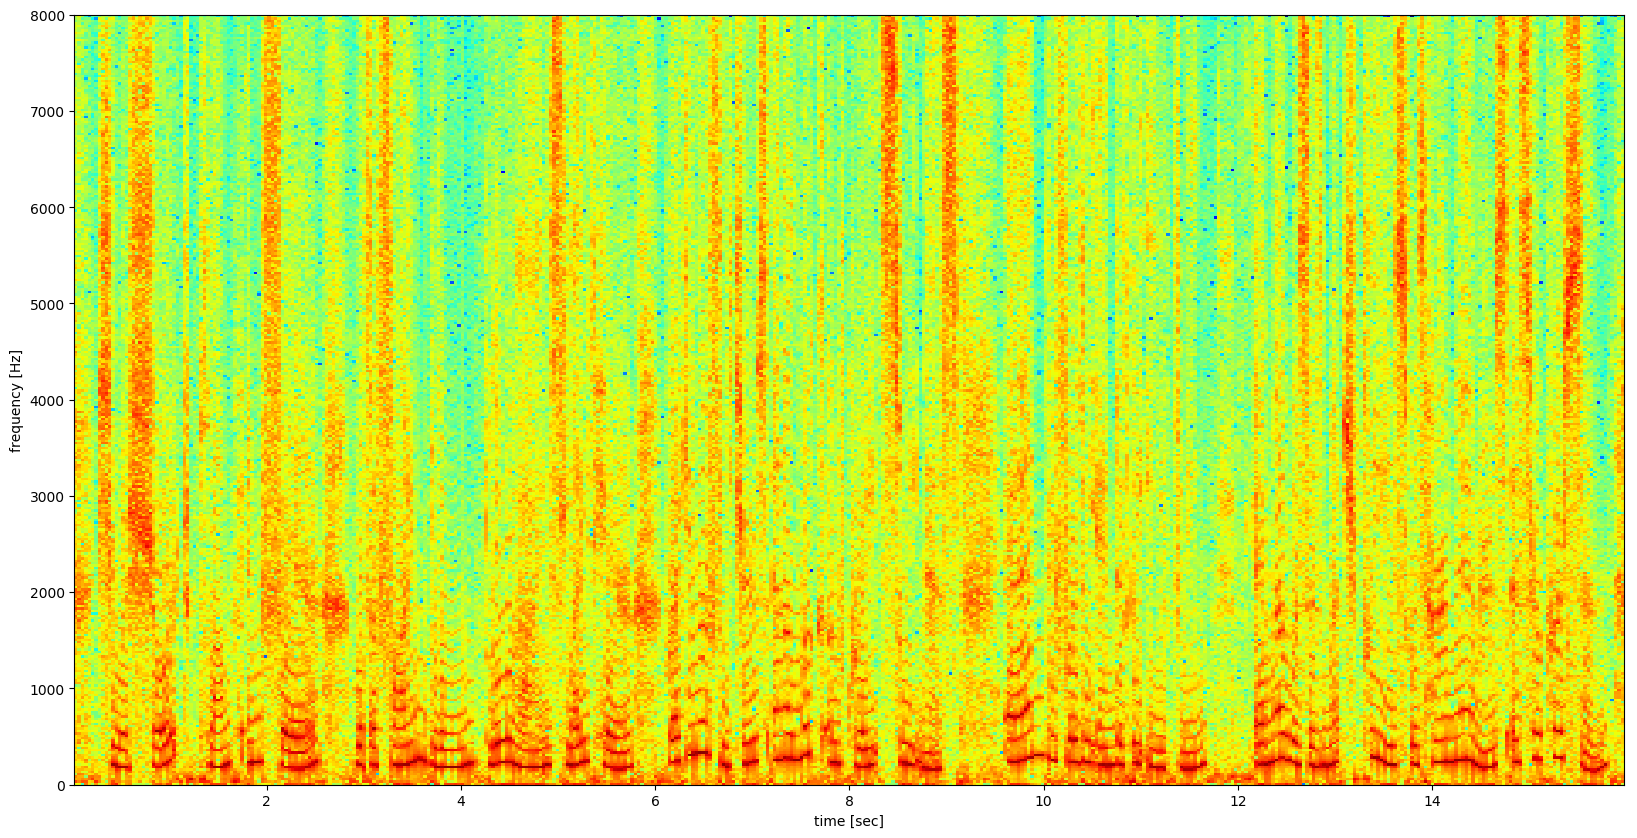

In [17]:
plt.figure(figsize=(20,10))
plot_spectrogram(spectrogram(x_μ, 640, 80, fs=fs), fs)
#plt.clim(-15, -4)
;

In [18]:
fx = FFTovertime(x, 640, 80, rectangularwindow)
fs_μ = FFTovertime(x_μ, 640, 80, rectangularwindow)
;

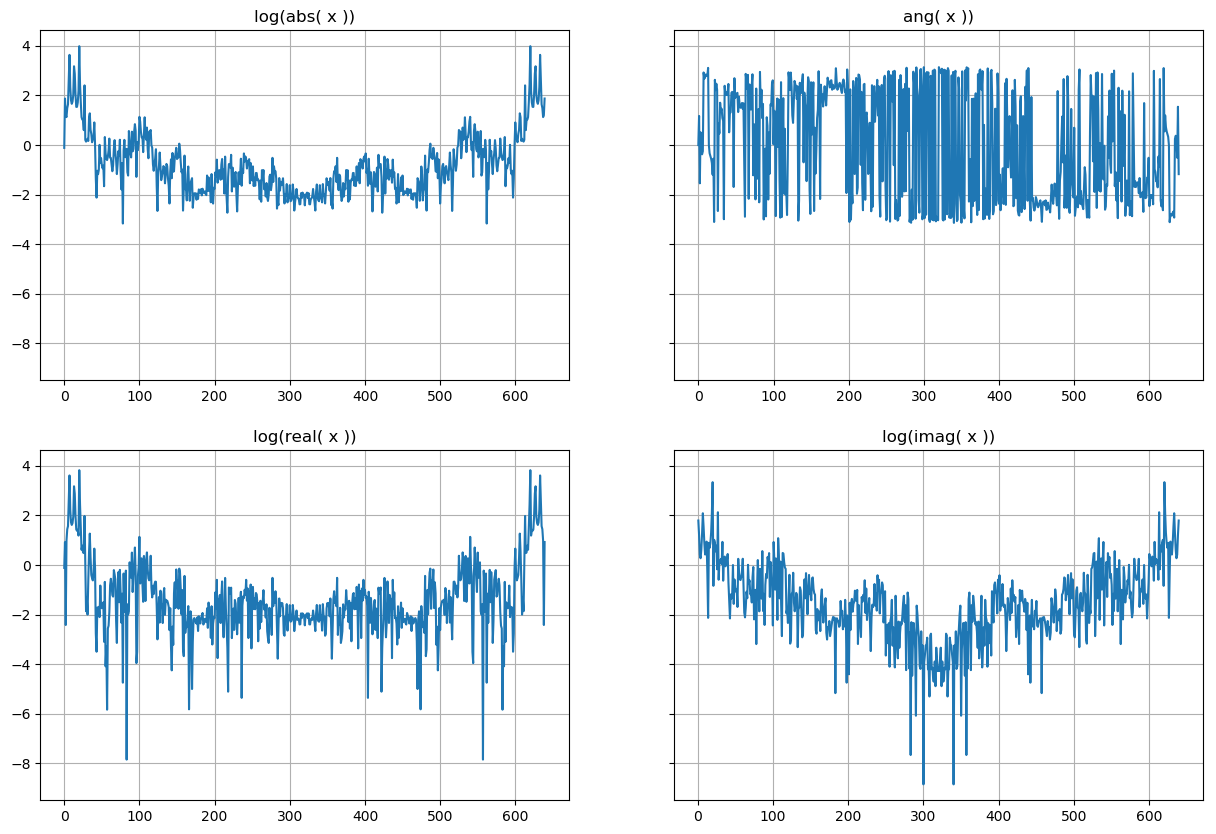

PyObject Text(0.5, 1.0, 'log(imag( x ))')

In [19]:
tplot = 64
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10), sharey=true)
ax[1,1].plot(log.(abs.(fx[tplot,:]))), 
ax[1,2].plot(angle.(fx[tplot,:]))
ax[2,1].plot(log.(abs.(real.(fx[tplot,:]))))
ax[2,2].plot(log.(abs.(imag.(fx[tplot,:]))))
ax[1,1].grid(), ax[1,2].grid(), ax[2,1].grid(), ax[2,2].grid()
ax[1,1].set_title("log(abs( x ))")
ax[1,2].set_title("ang( x ))")
ax[2,1].set_title("log(real( x ))")
ax[2,2].set_title("log(imag( x ))")


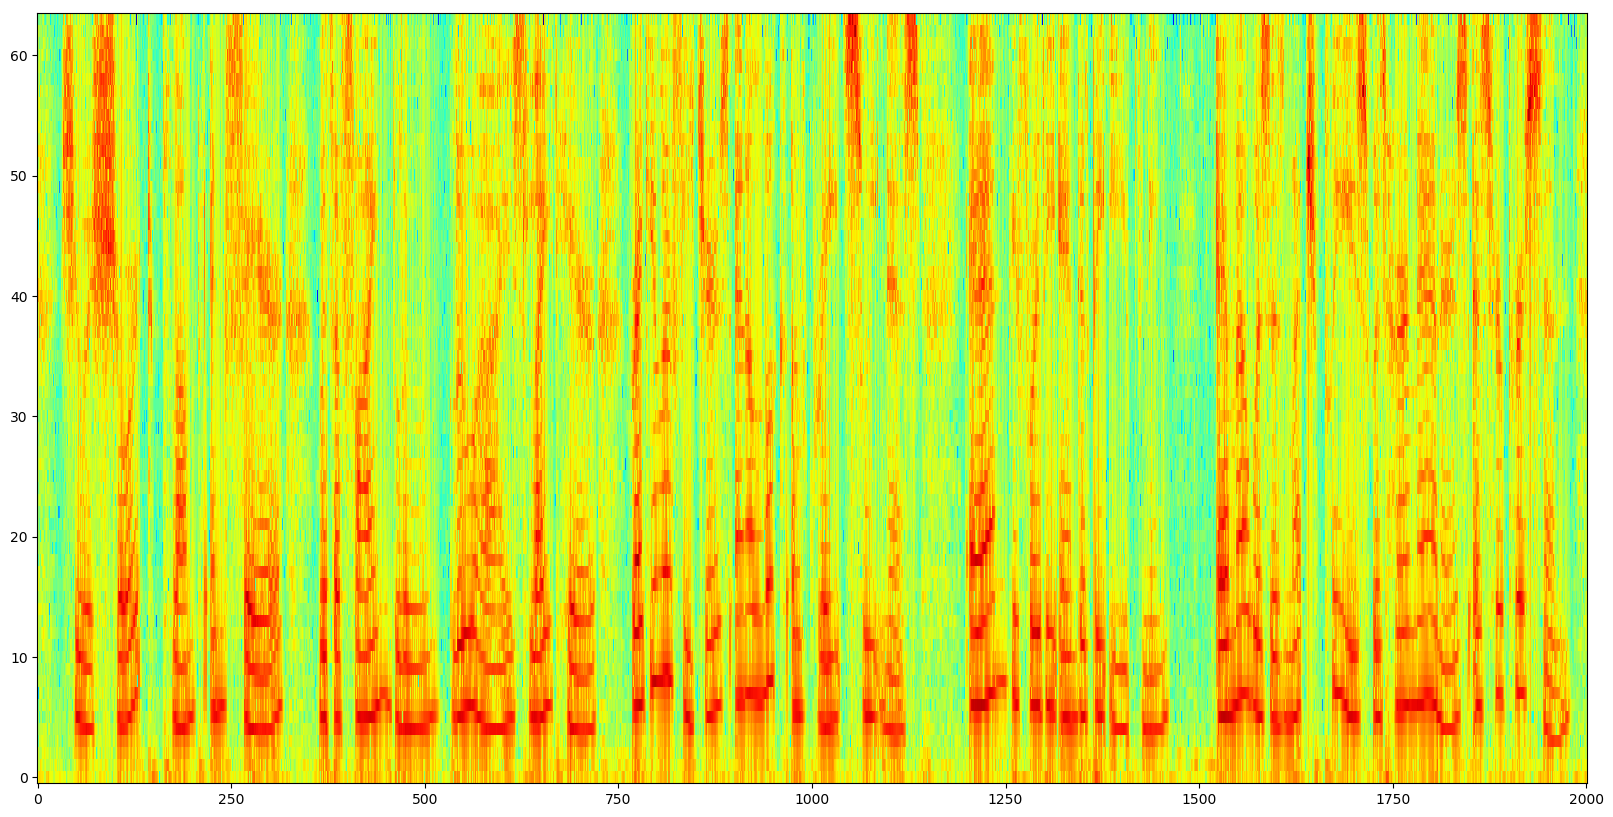

PyObject <matplotlib.image.AxesImage object at 0x000000005FB0ECC0>

In [20]:
fwx = warp_fft(x, 0.5756, 128, step_size=128)
plt.figure(figsize=(20,10))
imshow(log.(abs.(twosided2singlesided(fwx)))',
    aspect="auto",
               cmap="jet",
               origin="lower")
              # extent=[ last(spec.time), last(spec.freq), first(spec.freq)])

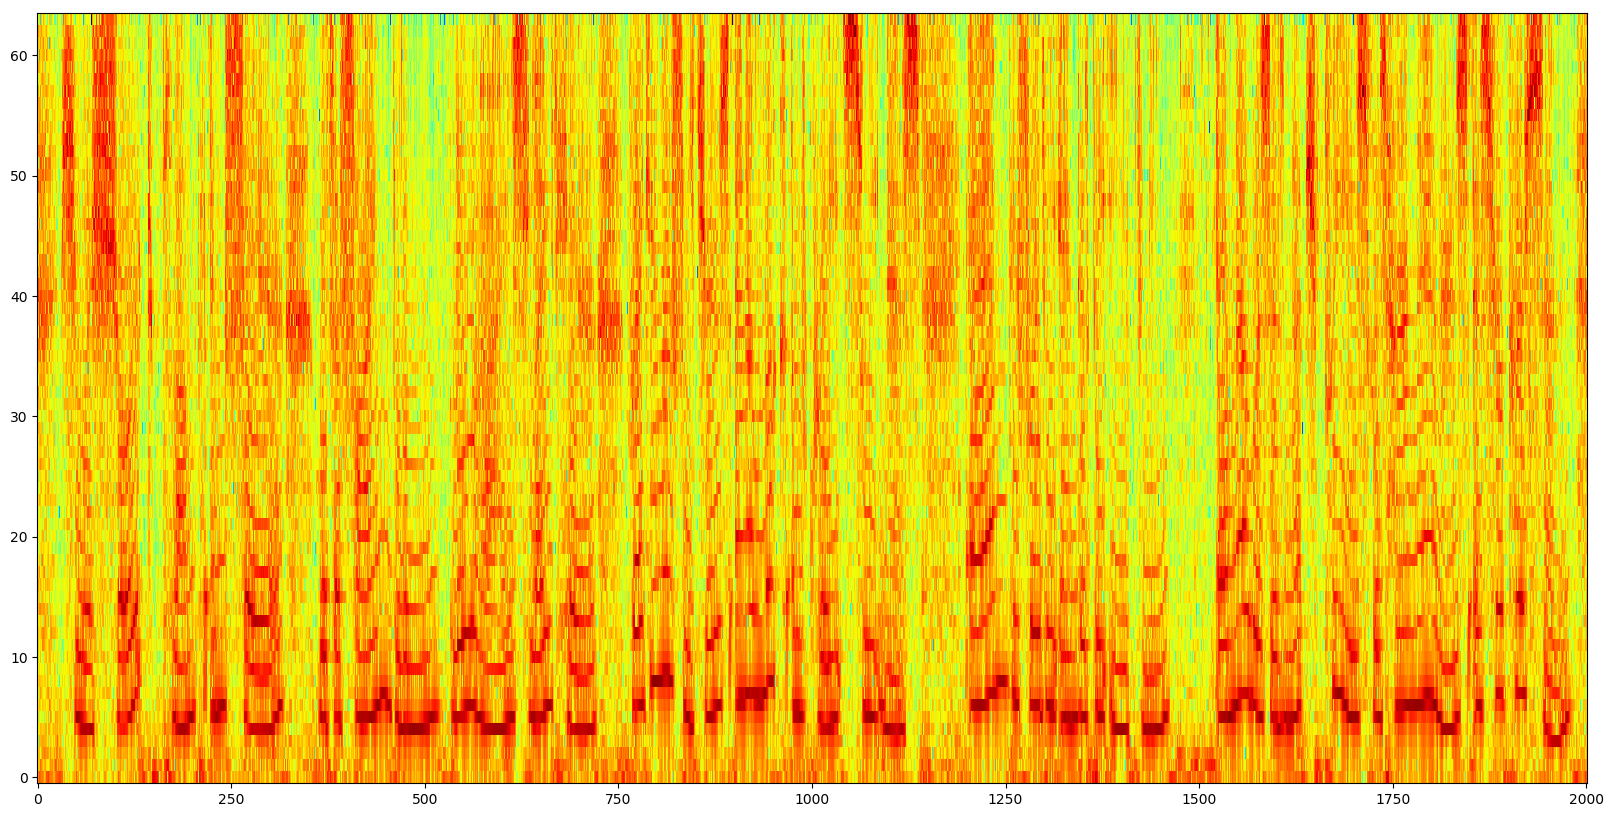

PyObject <matplotlib.image.AxesImage object at 0x000000005F82F4E0>

In [21]:
fwx_μ = warp_fft(x_μ, 0.5756, 128, step_size=128)
plt.figure(figsize=(20,10))
imshow(log.(abs.(twosided2singlesided(fwx_μ)))',
    aspect="auto",
               cmap="jet",
               origin="lower")
              # extent=[ last(spec.time), last(spec.freq), first(spec.freq)])